In [1]:
import pandas as pd

In [16]:
corona = pd.read_csv("./2021-09-28_corona.csv")
vaccine = pd.read_csv("./20210929_14_vaccine_bloomberg.csv")
country_code = pd.read_csv("./country.csv", encoding= "cp949")

corona.shape, vaccine.shape, country_code.shape

((222, 15), (207, 7), (227, 4))

In [9]:
country_code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   국문(코로나보드)  221 non-null    object
 1   영문(블룸버그)   202 non-null    object
 2   나라         12 non-null     object
 3   비고_뜻       30 non-null     object
dtypes: object(4)
memory usage: 7.2+ KB


In [11]:
corona.info(), vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   국가      222 non-null    object 
 1   치명(%)   222 non-null    object 
 2   완치(%)   219 non-null    float64
 3   발생률     222 non-null    object 
 4   인구수     222 non-null    object 
 5   확진자합계   222 non-null    int64  
 6   확진자1일   168 non-null    float64
 7   치료중합계   219 non-null    float64
 8   치료중1일   165 non-null    float64
 9   위중증합계   153 non-null    float64
 10  위중증1일   62 non-null     float64
 11  사망자합계   222 non-null    int64  
 12  사망자1일   131 non-null    float64
 13  완치합계    219 non-null    float64
 14  완치1일    146 non-null    float64
dtypes: float64(9), int64(2), object(4)
memory usage: 26.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  ---

(None, None)

In [12]:
country_code.head()

,국문(코로나보드),영문(블룸버그),나라,비고_뜻
0,가나,Ghana,NaN,NaN
1,가봉,Gabon,NaN,NaN
2,가이아나,Guyana,NaN,NaN
3,감비아,Gambia,NaN,NaN
4,과들루프,NaN,프랑스,Guadeloupe


In [13]:
corona.head()

,국가,치명(%),완치(%),발생률,인구수,확진자합계,확진자1일,치료중합계,치료중1일,위중증합계,위중증1일,사망자합계,사망자1일,완치합계,완치1일
0,미국🇺🇸,1.6,76.0,133095,331002651,43942335,187382.0,9838383.0,-23963.0,21819.0,-275.0,709119,2781.0,33394833.0,208564.0
1,인도🇮🇳,1.3,97.8,24431,1380004385,33714241,21093.0,289782.0,-7388.0,8944.0,NaN,447699,337.0,32976760.0,28144.0
2,브라질🇧🇷,2.8,95.3,100592,212559417,21366395,14423.0,410502.0,-6613.0,8318.0,NaN,594702,218.0,20361191.0,20818.0
3,영국🇬🇧,1.8,80.7,113959,67886011,7701715,37485.0,1346396.0,3904.0,878.0,-38.0,136208,40.0,6219111.0,33541.0
4,러시아🇷🇺,2.8,88.9,51151,145934462,7464708,21559.0,623692.0,3339.0,2300.0,NaN,205531,852.0,6635485.0,17368.0


In [17]:
corona["국가"].str.extract('([ㄱ-ㅣ가-핳]+)') #한글표기

,0
0,미국
1,인도
2,브라질
3,영국
4,러시아
...,...
217,마셜
218,바누아투
219,사모아
220,세인트


In [18]:
corona["한글표기"] = corona["국가"].str.extract('([ㄱ-ㅣ가-핳]+)') #한글표기

In [19]:
corona.head()

,국가,치명(%),완치(%),발생률,인구수,확진자합계,확진자1일,치료중합계,치료중1일,위중증합계,위중증1일,사망자합계,사망자1일,완치합계,완치1일,한글표기
0,미국🇺🇸,1.6,76.0,133095,331002651,43942335,187382.0,9838383.0,-23963.0,21819.0,-275.0,709119,2781.0,33394833.0,208564.0,미국
1,인도🇮🇳,1.3,97.8,24431,1380004385,33714241,21093.0,289782.0,-7388.0,8944.0,NaN,447699,337.0,32976760.0,28144.0,인도
2,브라질🇧🇷,2.8,95.3,100592,212559417,21366395,14423.0,410502.0,-6613.0,8318.0,NaN,594702,218.0,20361191.0,20818.0,브라질
3,영국🇬🇧,1.8,80.7,113959,67886011,7701715,37485.0,1346396.0,3904.0,878.0,-38.0,136208,40.0,6219111.0,33541.0,영국
4,러시아🇷🇺,2.8,88.9,51151,145934462,7464708,21559.0,623692.0,3339.0,2300.0,NaN,205531,852.0,6635485.0,17368.0,러시아


In [20]:
#columns 바꿔서 저장
col = ['국가', '한글표기', '위중증합계', '위중증1일', '치명(%)', '완치(%)', '발생률', 
       '인구수', '확진자합계', '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일']

new_corona = corona[col].copy()
new_corona

,국가,한글표기,위중증합계,위중증1일,치명(%),완치(%),발생률,인구수,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일
0,미국🇺🇸,미국,21819.0,-275.0,1.6,76.0,133095,331002651,43942335,187382.0,709119,2781.0,33394833.0,208564.0
1,인도🇮🇳,인도,8944.0,NaN,1.3,97.8,24431,1380004385,33714241,21093.0,447699,337.0,32976760.0,28144.0
2,브라질🇧🇷,브라질,8318.0,NaN,2.8,95.3,100592,212559417,21366395,14423.0,594702,218.0,20361191.0,20818.0
3,영국🇬🇧,영국,878.0,-38.0,1.8,80.7,113959,67886011,7701715,37485.0,136208,40.0,6219111.0,33541.0
4,러시아🇷🇺,러시아,2300.0,NaN,2.8,88.9,51151,145934462,7464708,21559.0,205531,852.0,6635485.0,17368.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,마셜 제도🇲🇭,마셜,NaN,NaN,-,100.0,68,59190,4,NaN,0,NaN,4.0,NaN
218,바누아투🇻🇺,바누아투,NaN,NaN,25,75.0,13,307145,4,NaN,1,NaN,3.0,NaN
219,사모아🇼🇸,사모아,NaN,NaN,-,100.0,15,198414,3,NaN,0,NaN,3.0,NaN
220,세인트헬레나🇸🇭,세인트,NaN,NaN,-,100.0,329,6077,2,NaN,0,NaN,2.0,NaN


In [22]:
country_code.columns

Index(['국문(코로나보드)', '영문(블룸버그)', '나라', '비고_뜻'], dtype='object')

In [23]:
country_code.columns = ["han_code",'eng_code','country','etc']

In [24]:
country_code

,han_code,eng_code,country,etc
0,가나,Ghana,NaN,NaN
1,가봉,Gabon,NaN,NaN
2,가이아나,Guyana,NaN,NaN
3,감비아,Gambia,NaN,NaN
4,과들루프,NaN,프랑스,Guadeloupe
...,...,...,...,...
222,NaN,Nauru,NaN,나우루
223,NaN,Tonga,NaN,통가
224,NaN,Turkmenistan,NaN,투르크메니스탄
225,NaN,Jersey,NaN,저지


In [25]:
df_corona = new_corona.merge(country_code, left_on = "한글표기", right_on = "han_code") #left_on과 right_on을 일치하도록 병합
df_corona

,국가,한글표기,위중증합계,위중증1일,치명(%),완치(%),발생률,인구수,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,han_code,eng_code,country,etc
0,미국🇺🇸,미국,21819.0,-275.0,1.6,76.0,133095,331002651,43942335,187382.0,709119,2781.0,33394833.0,208564.0,미국,U.S.,NaN,NaN
1,인도🇮🇳,인도,8944.0,NaN,1.3,97.8,24431,1380004385,33714241,21093.0,447699,337.0,32976760.0,28144.0,인도,India,NaN,NaN
2,브라질🇧🇷,브라질,8318.0,NaN,2.8,95.3,100592,212559417,21366395,14423.0,594702,218.0,20361191.0,20818.0,브라질,Brazil,NaN,NaN
3,영국🇬🇧,영국,878.0,-38.0,1.8,80.7,113959,67886011,7701715,37485.0,136208,40.0,6219111.0,33541.0,영국,U.K.,NaN,NaN
4,러시아🇷🇺,러시아,2300.0,NaN,2.8,88.9,51151,145934462,7464708,21559.0,205531,852.0,6635485.0,17368.0,러시아,Russia,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,몬트세랫🇲🇸,몬트세랫,NaN,NaN,3.0,90.9,6611,4992,33,NaN,1,NaN,30.0,NaN,몬트세랫,Montserrat,NaN,NaN
181,서사하라🇪🇭,서사하라,NaN,NaN,10,80.0,17,597339,10,NaN,1,NaN,8.0,NaN,서사하라,NaN,NaN,Western Sahara
182,바누아투🇻🇺,바누아투,NaN,NaN,25,75.0,13,307145,4,NaN,1,NaN,3.0,NaN,바누아투,NaN,NaN,Republic of Vanuatu
183,사모아🇼🇸,사모아,NaN,NaN,-,100.0,15,198414,3,NaN,0,NaN,3.0,NaN,사모아,Samoa,NaN,NaN


In [27]:
df_corona.drop(['국가','han_code','country', 'etc'] , axis = 1, inplace = True)

In [28]:
df_corona.head()

,한글표기,위중증합계,위중증1일,치명(%),완치(%),발생률,인구수,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,eng_code
0,미국,21819.0,-275.0,1.6,76.0,133095,331002651,43942335,187382.0,709119,2781.0,33394833.0,208564.0,U.S.
1,인도,8944.0,NaN,1.3,97.8,24431,1380004385,33714241,21093.0,447699,337.0,32976760.0,28144.0,India
2,브라질,8318.0,NaN,2.8,95.3,100592,212559417,21366395,14423.0,594702,218.0,20361191.0,20818.0,Brazil
3,영국,878.0,-38.0,1.8,80.7,113959,67886011,7701715,37485.0,136208,40.0,6219111.0,33541.0,U.K.
4,러시아,2300.0,NaN,2.8,88.9,51151,145934462,7464708,21559.0,205531,852.0,6635485.0,17368.0,Russia


In [29]:
df_corona_all = df_corona.merge(vaccine, left_on = 'eng_code', right_on = '국가')
df_corona_all.head()

,한글표기,위중증합계,위중증1일,치명(%),완치(%),발생률,인구수,확진자합계,확진자1일,사망자합계,...,완치합계,완치1일,eng_code,index,국가,백신접종수,Enough_percent_people,1차접종,2차접종,일별접종수
0,미국,21819.0,-275.0,1.6,76.0,133095,331002651,43942335,187382.0,709119,...,33394833.0,208564.0,U.S.,4.0,U.S.,391152580.0,61.1,64.4,55.8,701422.0
1,인도,8944.0,NaN,1.3,97.8,24431,1380004385,33714241,21093.0,447699,...,32976760.0,28144.0,India,2.0,India,876538600.0,32.0,46.7,16.8,7178901.0
2,브라질,8318.0,NaN,2.8,95.3,100592,212559417,21366395,14423.0,594702,...,20361191.0,20818.0,Brazil,5.0,Brazil,233261970.0,56.5,71.3,41.9,1317163.0
3,영국,878.0,-38.0,1.8,80.7,113959,67886011,7701715,37485.0,136208,...,6219111.0,33541.0,U.K.,12.0,U.K.,93565470.0,70.0,73.0,67.1,63126.0
4,러시아,2300.0,NaN,2.8,88.9,51151,145934462,7464708,21559.0,205531,...,6635485.0,17368.0,Russia,18.0,Russia,89865310.0,30.6,32.6,28.5,214966.0


In [30]:
df_corona_all.drop(['국가'],axis = 1, inplace = True)

In [32]:
df_corona_all

,한글표기,위중증합계,위중증1일,치명(%),완치(%),발생률,인구수,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,eng_code,index,백신접종수,Enough_percent_people,1차접종,2차접종,일별접종수
0,미국,21819.0,-275.0,1.6,76.0,133095,331002651,43942335,187382.0,709119,2781.0,33394833.0,208564.0,U.S.,4.0,391152580.0,61.1,64.4,55.8,701422.0
1,인도,8944.0,NaN,1.3,97.8,24431,1380004385,33714241,21093.0,447699,337.0,32976760.0,28144.0,India,2.0,876538600.0,32.0,46.7,16.8,7178901.0
2,브라질,8318.0,NaN,2.8,95.3,100592,212559417,21366395,14423.0,594702,218.0,20361191.0,20818.0,Brazil,5.0,233261970.0,56.5,71.3,41.9,1317163.0
3,영국,878.0,-38.0,1.8,80.7,113959,67886011,7701715,37485.0,136208,40.0,6219111.0,33541.0,U.K.,12.0,93565470.0,70.0,73.0,67.1,63126.0
4,러시아,2300.0,NaN,2.8,88.9,51151,145934462,7464708,21559.0,205531,852.0,6635485.0,17368.0,Russia,18.0,89865310.0,30.6,32.6,28.5,214966.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,앵귈라,NaN,NaN,0.3,93.1,25928,15003,389,25.0,1,NaN,362.0,17.0,Anguilla,220.0,18584.0,61.9,63.3,60.6,2.0
166,마카오,NaN,NaN,-,90.0,109,649335,70,3.0,0,NaN,63.0,NaN,Macau,152.0,649564.0,47.8,51.2,44.6,4123.0
167,몬트세랫,NaN,NaN,3.0,90.9,6611,4992,33,NaN,1,NaN,30.0,NaN,Montserrat,224.0,2871.0,28.7,29.7,27.8,2.0
168,사모아,NaN,NaN,-,100.0,15,198414,3,NaN,0,NaN,3.0,NaN,Samoa,189.0,149431.0,37.2,49.3,25.0,981.0


C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47581 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54633 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-

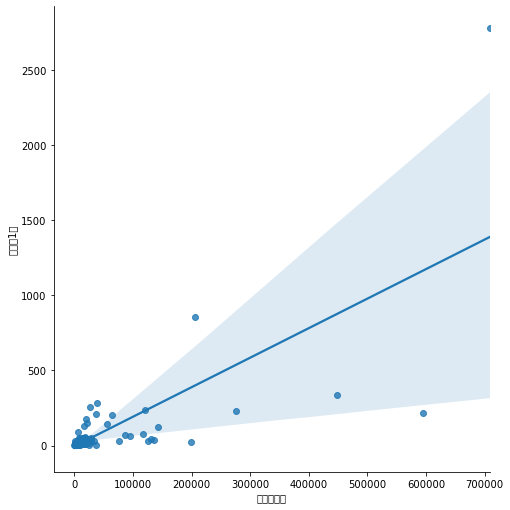

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.lmplot(x= "사망자합계", y= "사망자1일", data = df_corona_all, size = 7)